### Next Word Prediction
### Dr.Strange Dataset 

In [1]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [5]:
file = open("The_Strange_Case_of_Dr. Jekyll_and_ Mr. Hy _by_Robert_Louis_Stevenson.txt", "r", encoding = "utf8")
lines = []

In [6]:
for i in file:
    lines.append(i)

In [7]:
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  STORY OF THE DOOR

The Last Line:  



In [8]:
file = open("The_Strange_Case_of_Dr. Jekyll_and_ Mr. Hy _by_Robert_Louis_Stevenson.txt", "rb")
data = file.read()
words = data.split()

In [9]:
print('Number of words in text file :', len(words))

Number of words in text file : 25571


### Cleaning the Data

In [10]:
data = ""

In [11]:
for i in lines:
    data = ' '. join(lines)

In [12]:
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'STORY OF THE DOOR  Mr. Utterson the lawyer was a man of a rugged countenance that was never lighted by a smile; cold, scanty and embarrassed in discourse; backward in sentiment; lean, long, dusty, dreary and yet somehow lovable. At friendly meetings, and when the wine was to his taste, something eminently human beaconed from his eye; something indeed which n'

In [13]:
import string

In [14]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

In [15]:
new_data[:500]

'STORY OF THE DOOR  Mr  Utterson the lawyer was a man of a rugged countenance that was never lighted by a smile  cold  scanty and embarrassed in discourse  backward in sentiment  lean  long  dusty  dreary and yet somehow lovable  At friendly meetings  and when the wine was to his taste  something eminently human beaconed from his eye  something indeed which never found its way into his talk  but which spoke not only in these silent symbols of the after dinner face  but more often and loudly in th'

In [16]:
z = []

In [17]:
for i in data.split():
    if i not in z:
        z.append(i)

In [18]:
data = ' '.join(z)
data[:500]

'STORY OF THE DOOR Mr. Utterson the lawyer was a man of rugged countenance that never lighted by smile; cold, scanty and embarrassed in discourse; backward sentiment; lean, long, dusty, dreary yet somehow lovable. At friendly meetings, when wine to his taste, something eminently human beaconed from eye; indeed which found its way into talk, but spoke not only these silent symbols after-dinner face, more often loudly acts life. He austere with himself; drank gin he alone, mortify taste for vintage'

### Tokenization

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [20]:
# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

In [21]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data

[64,
 39,
 65,
 12,
 419,
 5,
 65,
 108,
 109,
 420,
 29,
 39,
 1106,
 1107,
 18,
 421,
 1108,
 19,
 110,
 422,
 1109,
 198,
 1110,
 30,
 1111,
 423,
 1112,
 1113,
 424,
 425,
 1114,
 199,
 1115,
 1116,
 200,
 1117,
 1118,
 111,
 201,
 6,
 426,
 202,
 427,
 1119,
 112,
 1120,
 428,
 203,
 66,
 204,
 1121,
 429,
 20,
 430,
 431,
 205,
 432,
 67,
 206,
 207,
 208,
 1122,
 68,
 113,
 40,
 41,
 1123,
 433,
 1124,
 42,
 43,
 1125,
 44,
 69,
 1126,
 1127,
 43,
 114,
 1128,
 202,
 13,
 1129,
 434,
 1130,
 209,
 70,
 1131,
 435,
 71,
 1132,
 115,
 205,
 436,
 1133,
 1134,
 72,
 1135,
 1136,
 1137,
 1138,
 200,
 210,
 437,
 211,
 1139,
 1140,
 1141,
 1142,
 1143,
 1144,
 438,
 439,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1,
 440,
 212,
 1151,
 441,
 213,
 1152,
 116,
 1153,
 442,
 20,
 1,
 30,
 21,
 117,
 3,
 1154,
 443,
 118,
 73,
 1155,
 444,
 14,
 1156,
 1157,
 1158,
 74,
 198,
 445,
 214,
 207,
 45,
 424,
 215,
 446,
 216,
 217,
 447,
 1159,
 218,
 1160,
 119,
 448,
 1161,
 449,
 5,
 116

In [22]:
tokenizer.word_index

{'”': 1,
 'jekyll': 2,
 'it': 3,
 'you': 4,
 'utterson': 5,
 'to': 6,
 'him': 7,
 'well': 8,
 'sir': 9,
 'hyde': 10,
 'self': 11,
 'door': 12,
 'for': 13,
 'good': 14,
 'street': 15,
 'me': 16,
 'lanyon': 17,
 'that': 18,
 'by': 19,
 'way': 20,
 'this': 21,
 'will': 22,
 'night': 23,
 'house': 24,
 'square': 25,
 'now': 26,
 'god': 27,
 'poole': 28,
 'man': 29,
 'in': 30,
 'myself': 31,
 'again': 32,
 'right': 33,
 'word': 34,
 'room': 35,
 'here': 36,
 'glass': 37,
 'evil': 38,
 'of': 39,
 'face': 40,
 'more': 41,
 'life': 42,
 'he': 43,
 'with': 44,
 'so': 45,
 'is': 46,
 'time': 47,
 'said': 48,
 'all': 49,
 'voice': 50,
 'home': 51,
 'end': 52,
 'there': 53,
 'once': 54,
 'enough': 55,
 '’': 56,
 'key': 57,
 'day': 58,
 'know': 59,
 'moment': 60,
 'letter': 61,
 'guest': 62,
 'death': 63,
 'story': 64,
 'the': 65,
 'indeed': 66,
 'not': 67,
 'after': 68,
 'himself': 69,
 'had': 70,
 'one': 71,
 'others': 72,
 'last': 73,
 'men': 74,
 'hands': 75,
 'friends': 76,
 'other': 77,
 'the

In [23]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

4152


In [24]:
sequences = []

In [25]:
for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

In [26]:
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  6439


array([[ 64,  39],
       [ 39,  65],
       [ 65,  12],
       [ 12, 419],
       [419,   5],
       [  5,  65],
       [ 65, 108],
       [108, 109],
       [109, 420],
       [420,  29]])

In [27]:
X = []
y = []
total_words_dropped = 0

In [28]:
for i in sequences:
    if len(i) > 1:
        for index in range(1, len(i)):
            X.append(i[:index])
            y.append(i[index])
    else:
        total_words_dropped += 1

In [29]:
print("Total Single Words Dropped are:", total_words_dropped)

Total Single Words Dropped are: 0


In [30]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [array([64]), array([39]), array([65]), array([12]), array([419])]
The responses are:  [39, 65, 12, 419, 5]


In [31]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [32]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the model

In [33]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             41520     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 4152)              4156152   
                                                                 
Total params: 17,246,672
Trainable params: 17,246,672
Non-trainable params: 0
_________________________________________________________________


### Plot the model

In [35]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

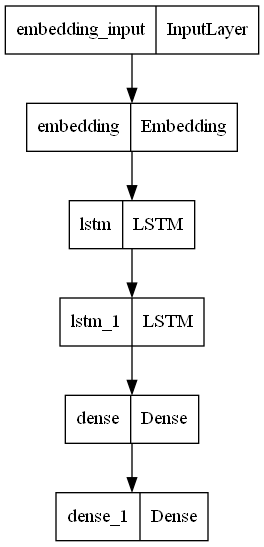

In [36]:
keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [37]:
#Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

In [38]:
checkpoint = ModelCheckpoint("weights_2.h5", monitor='loss', verbose=1,
save_best_only=True, mode='auto')

In [39]:
reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

In [40]:
logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Call Backs

In [41]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001),metrics="accuracy")

In [43]:
model.evaluate(X,y)

202/202 [==============================] - 6s 19ms/step - loss: 8.3313 - accuracy: 0.0000e+00


[8.331332206726074, 0.0]

In [44]:
model = model.fit(X, y, epochs=50, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 1.7652 - accuracy: 0.4606
Epoch 1: loss improved from 1.81261 to 1.76518, saving model to weights_2.h5
101/101 [==============================] - 22s 199ms/step - loss: 1.7652 - accuracy: 0.4606 - lr: 0.0010
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 1.7230 - accuracy: 0.4735
Epoch 2: loss improved from 1.76518 to 1.72296, saving model to weights_2.h5
101/101 [==============================] - 21s 206ms/step - loss: 1.7230 - accuracy: 0.4735 - lr: 0.0010
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 1.6865 - accuracy: 0.4824
Epoch 3: loss improved from 1.72296 to 1.68652, saving model to weights_2.h5
101/101 [==============================] - 21s 209ms/step - loss: 1.6865 - accuracy: 0.4824 - lr: 0.0010
Epoch 4/50
101/101 [==============================] - ETA: 0s - loss: 1.6426 - accuracy: 0.4875
Epoch 4: loss improved from 1.68652 to 1.64260, saving model to weight

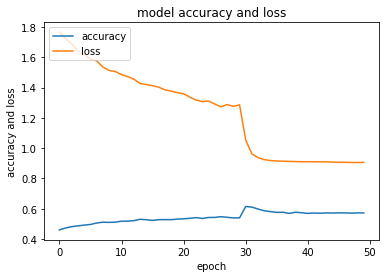

In [45]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [44]:
model.save_weights("C:\\Users\\deepak\\Downloads\\Set 3\\weights_2.h5")

In [45]:
vocab_array = np.array(list(tokenizer.word_index.keys()))

In [46]:
vocab_array

array(['”', 'jekyll', 'it', ..., 'careless', 'concerns', 'proceed'],
      dtype='<U19')

In [47]:
# Importing the Libraries
from tensorflow.keras.models import load_model
import numpy as np
import pickle

In [48]:
# Load the model and tokenizer
model.load_weights("C:\\Users\\deepak\\Downloads\\Set 3\\weights_2.h5")
tokenizer = pickle.load(open('C:\\Users\\deepak\\Downloads\\Set 3\\tokenizer1.pkl', 'rb'))

In [49]:
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [50]:
make_prediction("good",5)

1/1 [==============================] - 0s 50ms/step
['horrid' 'delight' 'business' ... 'bigness' 'letters' 'grunted']
1/1 [==============================] - 0s 31ms/step
['horrid' 'delight' 'business' ... 'bigness' 'grunted' 'strange']
1/1 [==============================] - 0s 46ms/step
['horrid' 'business' 'delight' ... 'strange' 'restrictions' 'approving']
1/1 [==============================] - 0s 52ms/step
['horrid' 'business' 'grate' ... 'has' 'restrictions' 'luck']
1/1 [==============================] - 0s 65ms/step
['horrid' 'grate' 'business' ... 'grunted' 'bigness' 'opened']


'good restrictions restrictions letters letters letters'

### Observation:

We are able to develop a decent next word prediction model and are able to get a declining loss and an overall
decent performance.